In [1]:
import torch

torch.__version__

'2.10.0+cpu'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data

df = pd.read_csv('loan_data.csv')

In [4]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
# check for missing values

df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
# check for duplicates rows

df.duplicated().sum()

np.int64(0)

## EDA

In [7]:
# dtypes of the columns 

df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [8]:
# separate the numerical and categorical data

numerical_df = df.select_dtypes(include=np.number)

categorical_df = df.select_dtypes(exclude=np.number)

In [9]:
numerical_df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [10]:
categorical_df

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [11]:
# print the statical summary

numerical_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [12]:
categorical_df.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [13]:
# # numerical columns in data

num_cols = numerical_df.columns[0:-1].tolist()

num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [14]:
from matplotlib.gridspec import GridSpec

In [15]:
def plot_numerical_cols(numerical_cols):
    plt.figure(figsize=(12,4))

    grid = GridSpec(nrows = 1,ncols=4)

    # set the axes

    # box plot
    ax1 = plt.subplot(grid[:,0])

    # histogram
    ax2 = plt.subplot(grid[:,1:3])

    #violin plt
    ax3 = plt.subplot(grid[:,3])

    # create box plot
    sns.boxplot(data=df,y=numerical_cols,ax=ax1)

    # create histogram
    sns.histplot(data=df,x=numerical_cols,ax=ax2)

    #create violin plot
    sns.violinplot(data=df,y=numerical_cols,ax=ax3)

    plt.tight_layout()
    plt.show()

Column: person_age


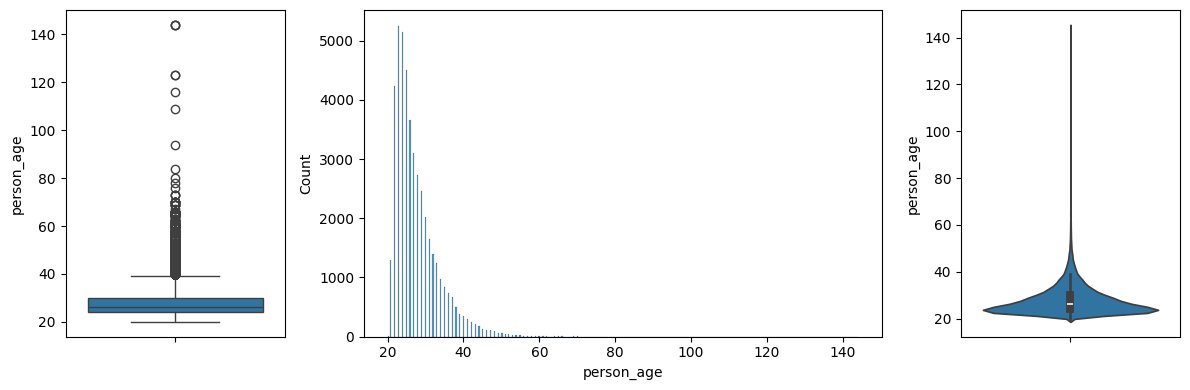

-----------------------------------



Column: person_income


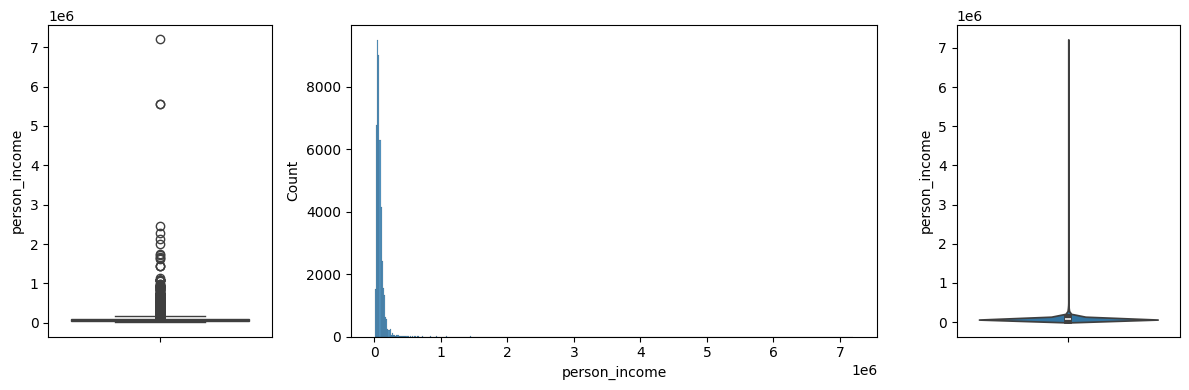

-----------------------------------



Column: person_emp_exp


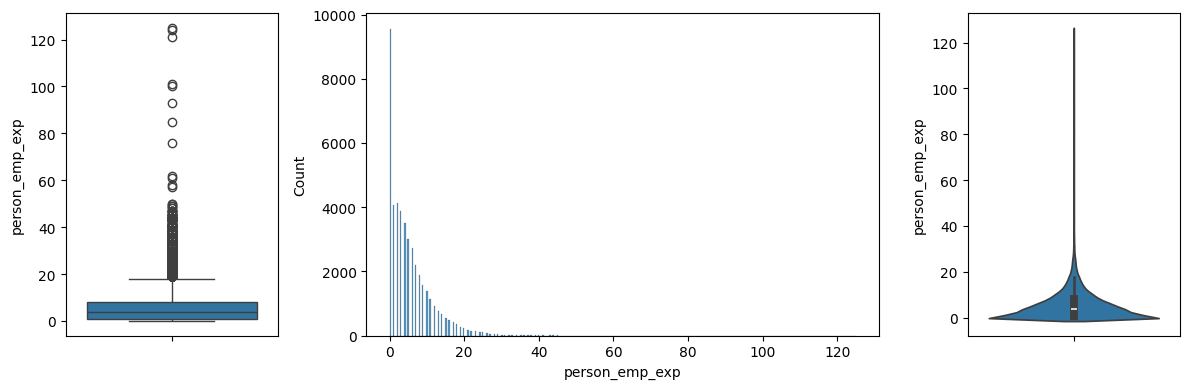

-----------------------------------



Column: loan_amnt


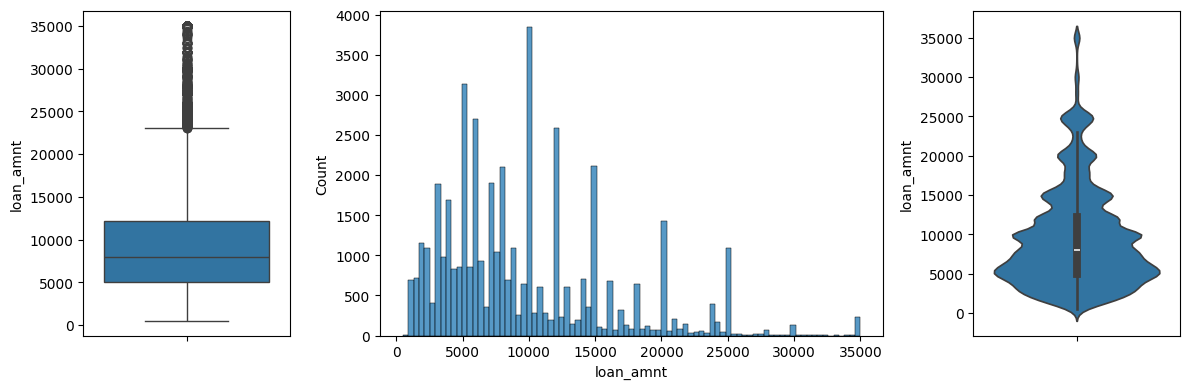

-----------------------------------



Column: loan_int_rate


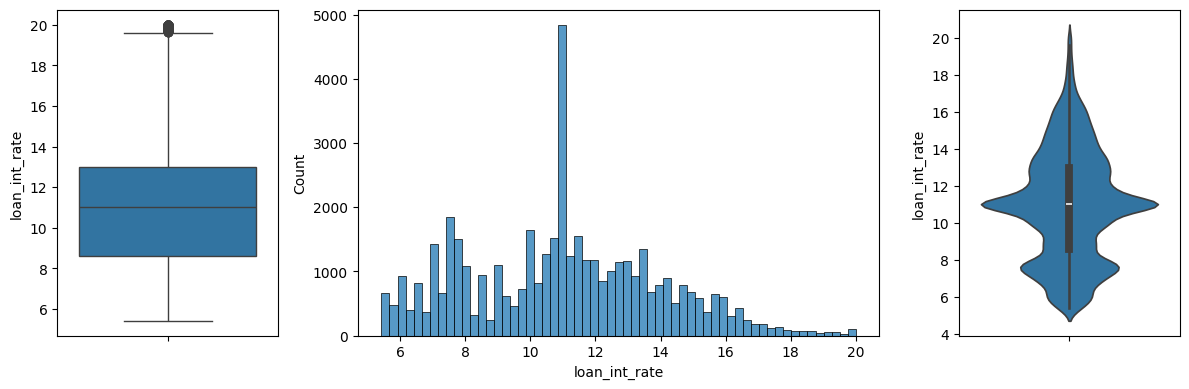

-----------------------------------



Column: loan_percent_income


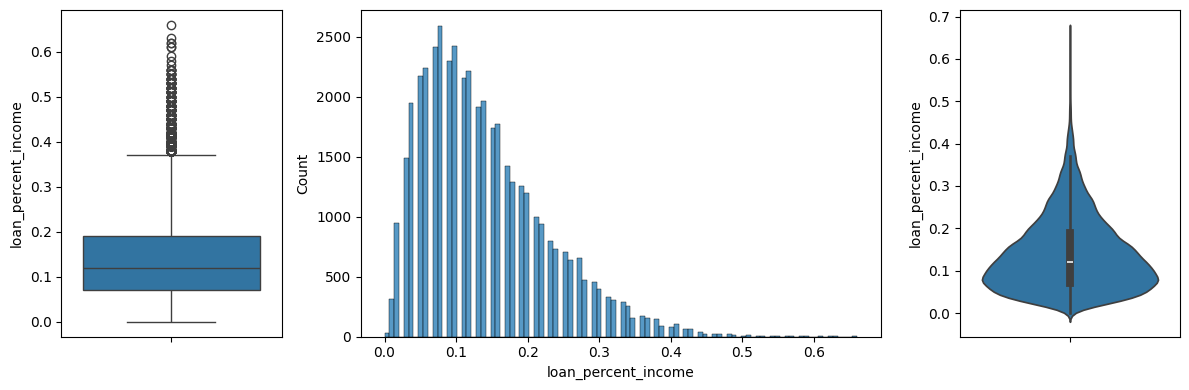

-----------------------------------



Column: cb_person_cred_hist_length


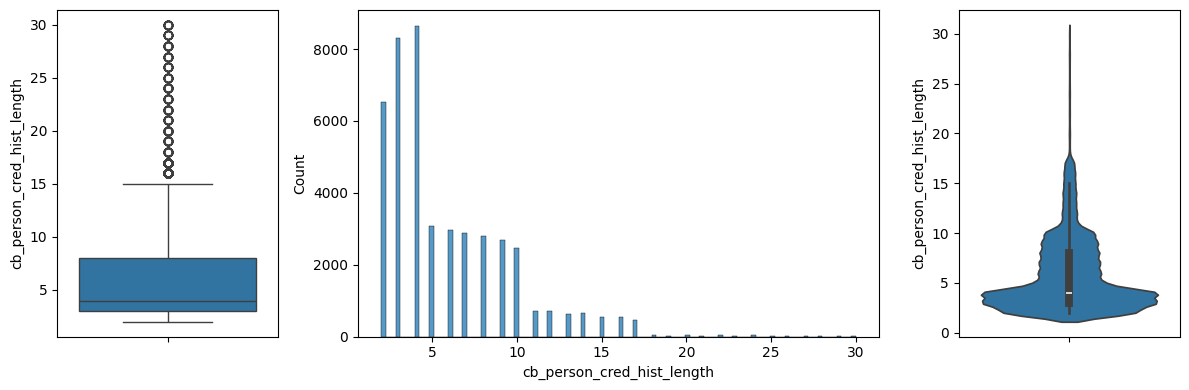

-----------------------------------



Column: credit_score


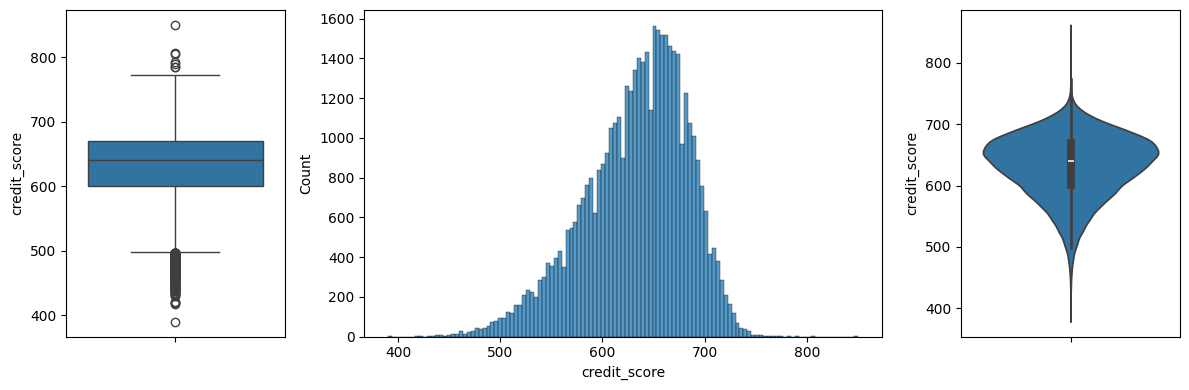

-----------------------------------





In [16]:
for num_col in num_cols:
    print(f'Column: {num_col}')
    plot_numerical_cols(num_col)
    print('-----------------------------------\n\n\n')

In [17]:
def plots_for_cat_cols(column_name):

    print(f"Number of unique value in {column_name}: {df[column_name].nunique()}",end="\n\n")
    print(f"unique value in {column_name}: {df[column_name].unique()}",end="\n\n")
    display(df[column_name].value_counts(normalize=True))

    sns.countplot(data=df,x=column_name)

    plt.xticks(rotation=45)
    plt.show()

In [18]:
numerical_df.columns[[-1]].tolist()

['loan_status']

In [19]:
cat_cols = categorical_df.columns.tolist() + numerical_df.columns[[-1]].tolist()

Column: person_gender
Number of unique value in person_gender: 2

unique value in person_gender: ['female' 'male']



person_gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64

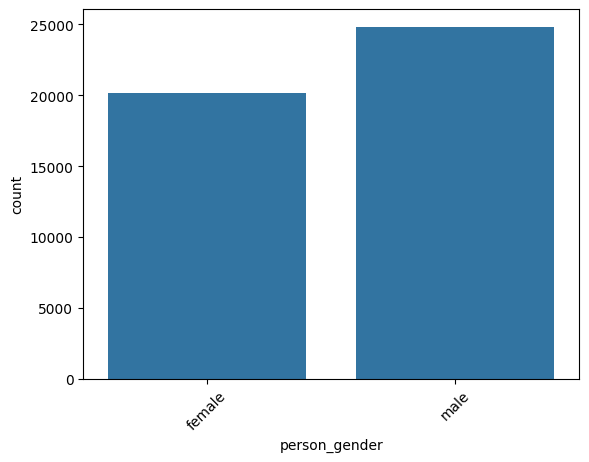

-----------------------------------



Column: person_education
Number of unique value in person_education: 5

unique value in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']



person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64

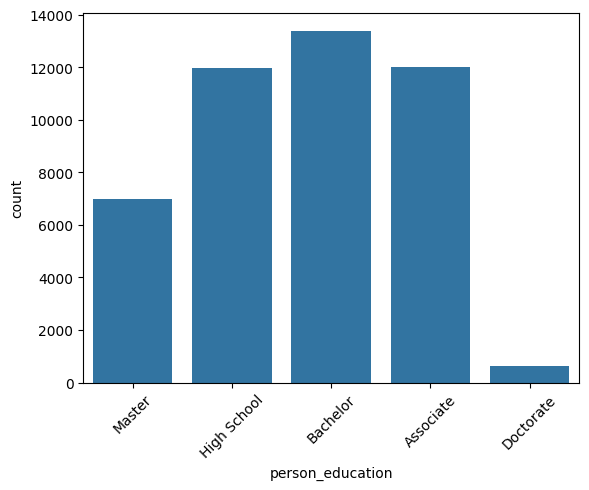

-----------------------------------



Column: person_home_ownership
Number of unique value in person_home_ownership: 4

unique value in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']



person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64

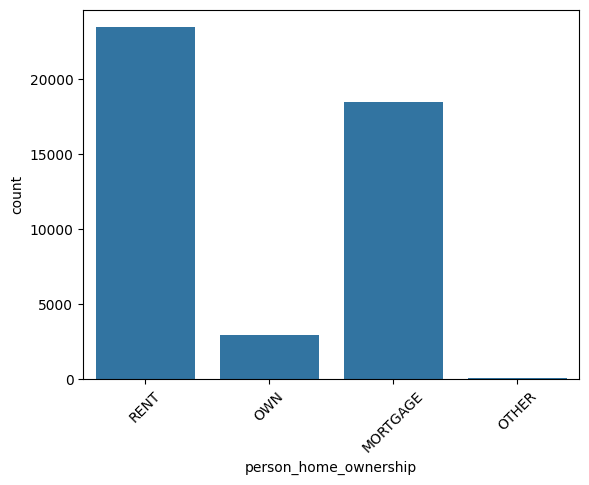

-----------------------------------



Column: loan_intent
Number of unique value in loan_intent: 6

unique value in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']



loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64

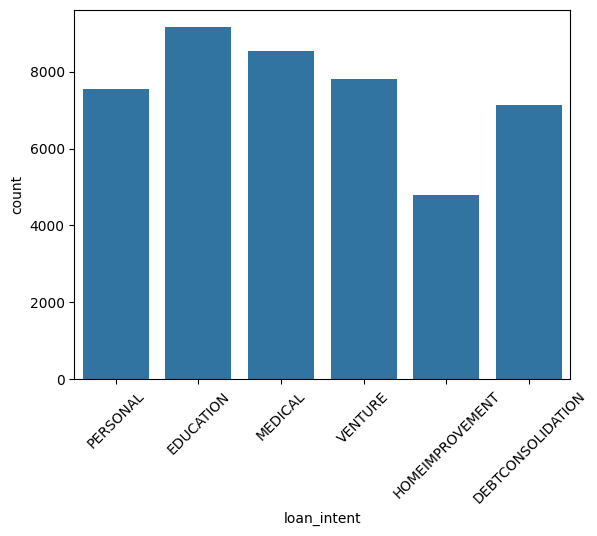

-----------------------------------



Column: previous_loan_defaults_on_file
Number of unique value in previous_loan_defaults_on_file: 2

unique value in previous_loan_defaults_on_file: ['No' 'Yes']



previous_loan_defaults_on_file
Yes    0.507956
No     0.492044
Name: proportion, dtype: float64

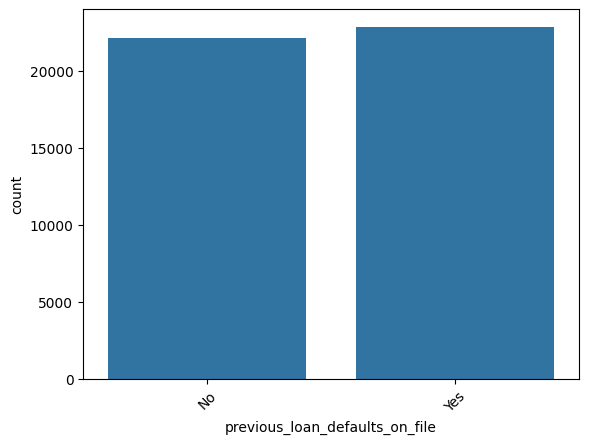

-----------------------------------



Column: loan_status
Number of unique value in loan_status: 2

unique value in loan_status: [1 0]



loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

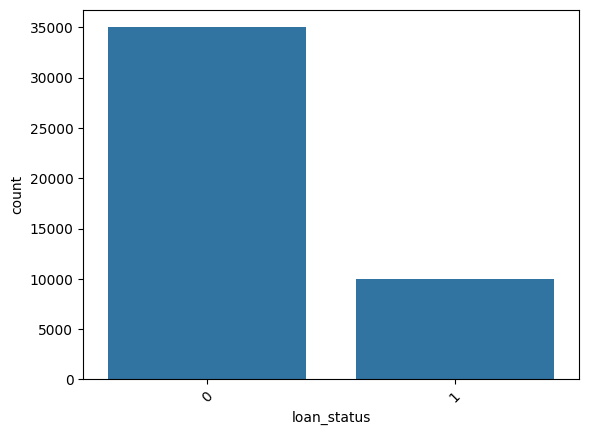

-----------------------------------





In [20]:
for cat_col in cat_cols:
    print(f'Column: {cat_col}')
    plots_for_cat_cols(cat_col)
    print('-----------------------------------\n\n\n')

## FE

In [21]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

In [22]:
# make X and y


X,y = df.drop(columns=['loan_status']), df['loan_status']

In [23]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [24]:
X_train.shape

(36000, 13)

In [25]:
X_test.shape

(9000, 13)

In [26]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [27]:
cat_cols.pop(-1)

'loan_status'

In [28]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [29]:
cat_cols.pop(1)

'person_education'

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
# pipeline for numerical columns
# 1. outlier capping
# 2. scaling -> robust scaler

num_pipe = Pipeline(steps=[
    ("outlier",Winsorizer(capping_method='iqr',tail='both',fold=1.5)),
    ('scaling',RobustScaler())
])

num_pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('outlier', ...), ('scaling', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,capping_method,'iqr'
,tail,'both'
,fold,1.5
,add_indicators,False
,variables,None
,missing_values,'raise'
,"with_centering with_centering: bool, default=TrueIf `True`, center the data before scaling.This will cause :meth:`transform` to raise an exception when attemptedon sparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True


In [32]:
order_of_education = ['High School','Associate','Bachelor','Master','Doctorate']

In [33]:
# transformer object
# 1. OHE
# 2. num pipe
# 3. ordinal encoder

preprocessor = ColumnTransformer(transformers=[
    ('num_pipe',num_pipe,num_cols),
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols),
    ("ordinal",OrdinalEncoder(categories=[order_of_education],handle_unknown="use_encoded_value",unknown_value=-1),["person_education"])
],remainder='passthrough',n_jobs=-1,verbose_feature_names_out=False)

In [34]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_pipe', ...), ('ohe', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature

In [35]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [36]:
# features names

feature_names = preprocessor.get_feature_names_out()

feature_names

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [37]:
feature_names.shape

(19,)

## Model Building

In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

### Build the dataset

In [39]:
# create a dataset class 

class LoanDataset(Dataset):

    def __init__(self,X,y):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y.values).to(torch.float)
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,idx):
        row,label = self.X[idx],self.y[idx]

        return row,label

In [40]:
temp_dataset = LoanDataset(X_train[:10],y_train.iloc[:10])

temp_dataset

In [41]:
len(temp_dataset)

10

In [42]:
temp_dataset[2]

(tensor([ 0.5000,  2.0943,  0.4286,  0.2764,  0.3790, -0.6667,  1.0000, -0.0294,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  3.0000]),
 tensor(0.))

In [43]:
# define the dataset 

train_dataset = LoanDataset(X_train,y_train)

test_dataset = LoanDataset(X_test,y_test)

In [44]:
# define the data loaders

train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)

test_dataloader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [45]:
for batch_features, batch_label in train_dataloader:
    print(batch_features.shape)
    print(batch_label.shape)
    break

torch.Size([32, 19])
torch.Size([32])


### Model Architecture

In [46]:
# create the model here

class MyModel(nn.Module):

    def __init__(self,num_features):
        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features,264),
            nn.BatchNorm1d(264),
            nn.ReLU(),

            nn.Linear(264,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64,1),
            nn.Sigmoid()
            
        )

    def forward(self,X):
        predictions = self.network(X)
        return predictions

In [47]:
# define my model

model = MyModel(num_features=X_train.shape[1])

In [48]:
model

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=264, bias=True)
    (1): BatchNorm1d(264, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=264, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [49]:
# set the epochs and lr

epochs = 20
lr = 0.001



In [50]:
from torch.optim import Adam

In [51]:
# set the optimizer

optimizer = Adam(params = model.parameters(),lr=lr)

In [52]:
# set oout loss function

loss_fn = nn.BCELoss()

In [53]:
len(train_dataloader)

1125

In [54]:
# training loop

train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

# iterate over all  the epochs

for epoch in range(epochs+1):

    train_loss = 0.0
    test_loss = 0.0

    # iterate over the batches of training data

    for batch_features_train, batch_label_train in train_dataloader:

        # forward pass
        y_pred_train = model(batch_features_train)

        # calculate the loss
        batch_loss_train = loss_fn(y_pred_train,batch_label_train.unsqueeze(1))

        # clear the gradients
        optimizer.zero_grad()

        # calculate the gradients using back propagation
        batch_loss_train.backward()

        # update the model parameters using the optimizer
        optimizer.step()

        # add the batch loss to the total train loss
        train_loss += batch_loss_train.item()

    for batch_features_test, batch_label_test in test_dataloader:

        with torch.no_grad():
            # forward pass

            y_pred_test = model(batch_features_test)

            #calculate the loss
            batch_loss_test = loss_fn(y_pred_test,batch_label_test.unsqueeze(1))

            # add the batch loss to the total test loss
            test_loss += batch_loss_test.item()

    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches

    print(f"Epoch: {epoch+1} | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}")

Epoch: 1 | Train Loss: 0.2290 | Test Loss: 0.2025
Epoch: 2 | Train Loss: 0.2001 | Test Loss: 0.1948
Epoch: 3 | Train Loss: 0.1938 | Test Loss: 0.1903
Epoch: 4 | Train Loss: 0.1925 | Test Loss: 0.1929
Epoch: 5 | Train Loss: 0.1885 | Test Loss: 0.1870
Epoch: 6 | Train Loss: 0.1869 | Test Loss: 0.1908
Epoch: 7 | Train Loss: 0.1841 | Test Loss: 0.1901
Epoch: 8 | Train Loss: 0.1848 | Test Loss: 0.1905
Epoch: 9 | Train Loss: 0.1824 | Test Loss: 0.1877
Epoch: 10 | Train Loss: 0.1824 | Test Loss: 0.1868
Epoch: 11 | Train Loss: 0.1809 | Test Loss: 0.1850
Epoch: 12 | Train Loss: 0.1786 | Test Loss: 0.1870
Epoch: 13 | Train Loss: 0.1785 | Test Loss: 0.1873
Epoch: 14 | Train Loss: 0.1769 | Test Loss: 0.1843
Epoch: 15 | Train Loss: 0.1771 | Test Loss: 0.1857
Epoch: 16 | Train Loss: 0.1736 | Test Loss: 0.1894
Epoch: 17 | Train Loss: 0.1744 | Test Loss: 0.1861
Epoch: 18 | Train Loss: 0.1725 | Test Loss: 0.1894
Epoch: 19 | Train Loss: 0.1715 | Test Loss: 0.1884
Epoch: 20 | Train Loss: 0.1707 | Test Lo

In [55]:
from sklearn.metrics import classification_report

In [56]:
# model to set to eval mode

model.eval()

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=264, bias=True)
    (1): BatchNorm1d(264, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=264, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [57]:
# define the data loaders

train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=False)

test_dataloader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [58]:
train_predictions = []

for batch_features,batch_labels in train_dataloader:

    with torch.no_grad():

        y_pred = model(batch_features).squeeze(1).numpy()

        y_pred = np.where(y_pred >= 0.5,1,0)

        train_predictions.extend(y_pred)

y_pred_train = np.array(train_predictions)

In [59]:
y_pred_train.shape

(36000,)

In [60]:
test_predictions = []

for batch_features,batch_labels in test_dataloader:

    with torch.no_grad():

        y_pred = model(batch_features).squeeze(1).numpy()

        y_pred = np.where(y_pred >= 0.5,1,0)

        test_predictions.extend(y_pred)

y_pred_test = np.array(test_predictions)

In [61]:
y_pred_test.shape

(9000,)

In [62]:
# classification report for train data

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28000
           1       0.91      0.78      0.84      8000

    accuracy                           0.93     36000
   macro avg       0.92      0.88      0.90     36000
weighted avg       0.93      0.93      0.93     36000



In [63]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7000
           1       0.87      0.76      0.81      2000

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



## SHAP

In [64]:
X_train.shape

(36000, 19)

In [67]:
# manual random seed

np.random.seed(42)

In [68]:
idx_values = np.random.choice(a=X_train.shape[0],size=500,replace=False)

In [71]:
# create a background data for deep explainer

sample_training_data = X_train[idx_values,:]

background_data = torch.tensor(sample_training_data,dtype=torch.float32)

In [72]:
# shape of the sample training data

background_data.shape

torch.Size([500, 19])

In [73]:
# create explainer to calculate the shap values
import shap

explainer = shap.DeepExplainer(model = model,
                               data = background_data)

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
# expected value

explainer.expected_value

array([0.23851185], dtype=float32)

In [77]:
# batch of test data

n_rows = 30

idx_values_batch = np.random.choice(a=X_test.shape[0],size=n_rows,replace=False)

X_test_batch = X_test[idx_values_batch,:]

X_test_batch.shape

(30, 19)

In [78]:
X_test_batch = torch.tensor(X_test_batch,dtype=torch.float32)

In [79]:
# calculate the shap values

shap_values = explainer(X_test_batch)

In [80]:
# shape of shap values

shap_values.shape

(30, 19, 1)

In [97]:
preprocessor.get_feature_names_out()

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [91]:
# make changes to the explanation objects

shap_values = shap.Explanation(
    values = shap_values.values,
    base_values = explainer.expected_value,
    data = X_test_batch,
    feature_names=preprocessor.get_feature_names_out()
)

In [94]:
shap_values.shape

(30, 19, 1)

## Global Plots

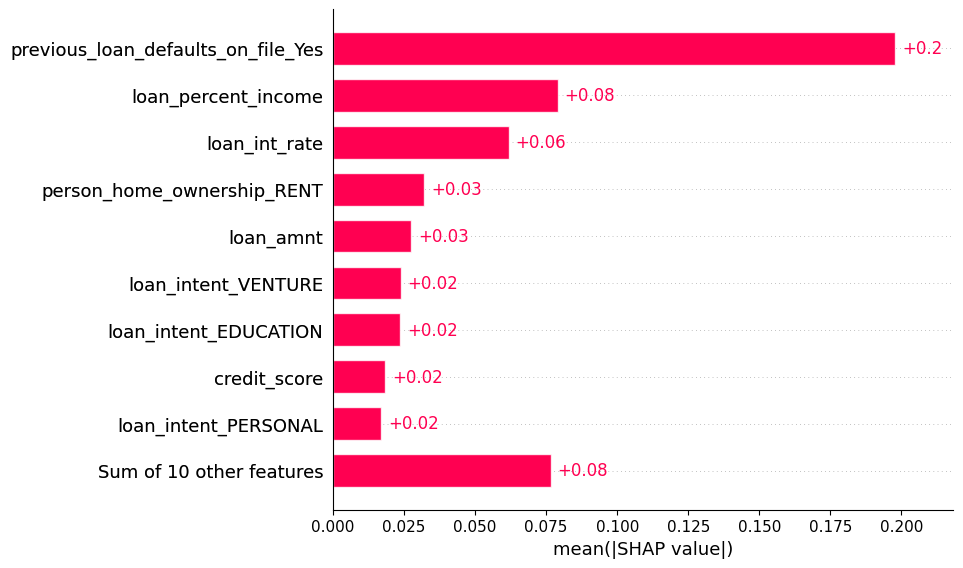

In [95]:
# bar plot

shap.plots.bar(shap_values[:,:,0])

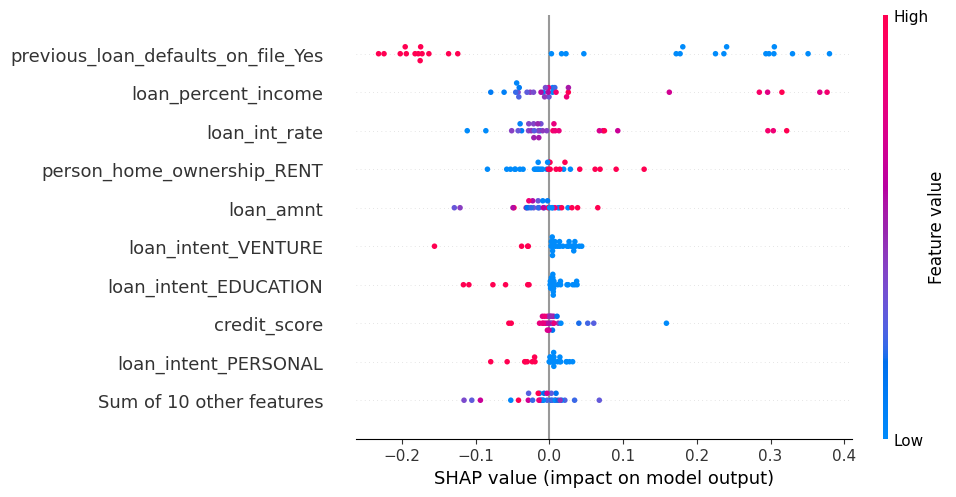

In [100]:
# waterfall plot

shap.plots.beeswarm(shap_values[:,:,0])

## Local Plots

In [98]:
row_shap_values = shap_values[0,:,0]

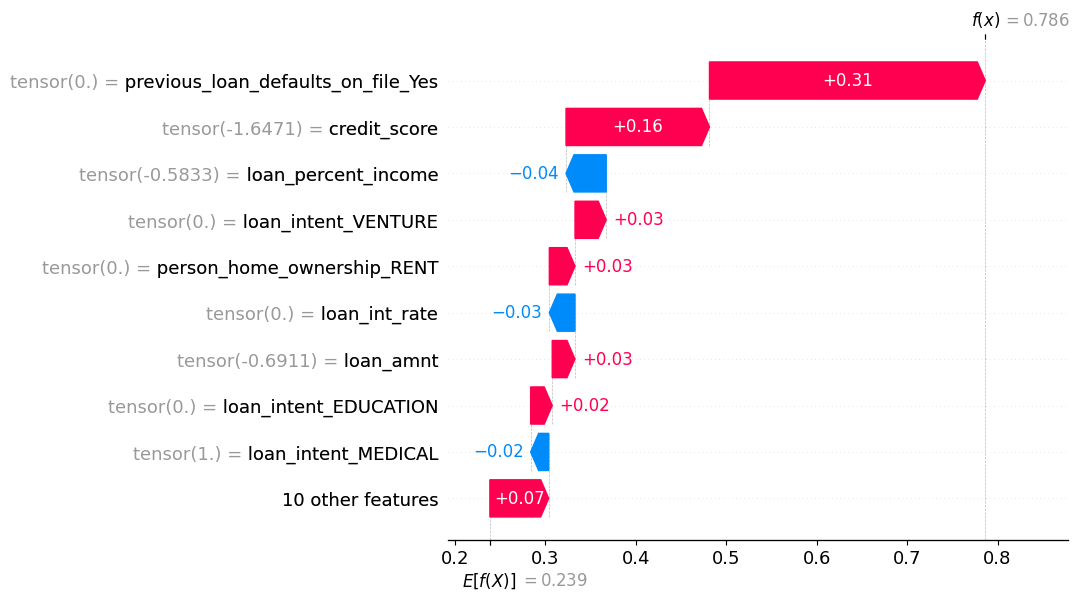

In [101]:
shap.plots.waterfall(row_shap_values)

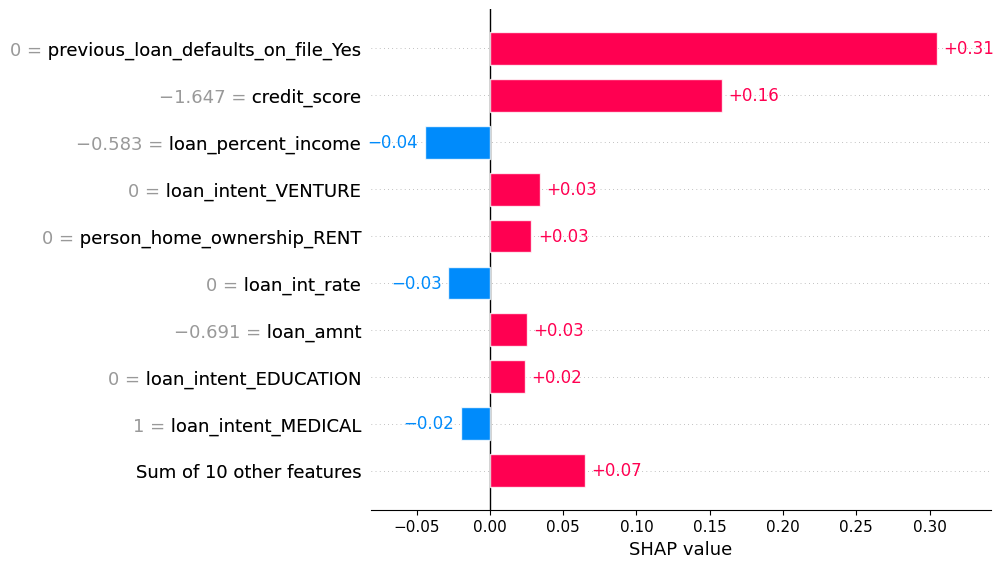

In [103]:
# bar plot

shap.plots.bar(row_shap_values)

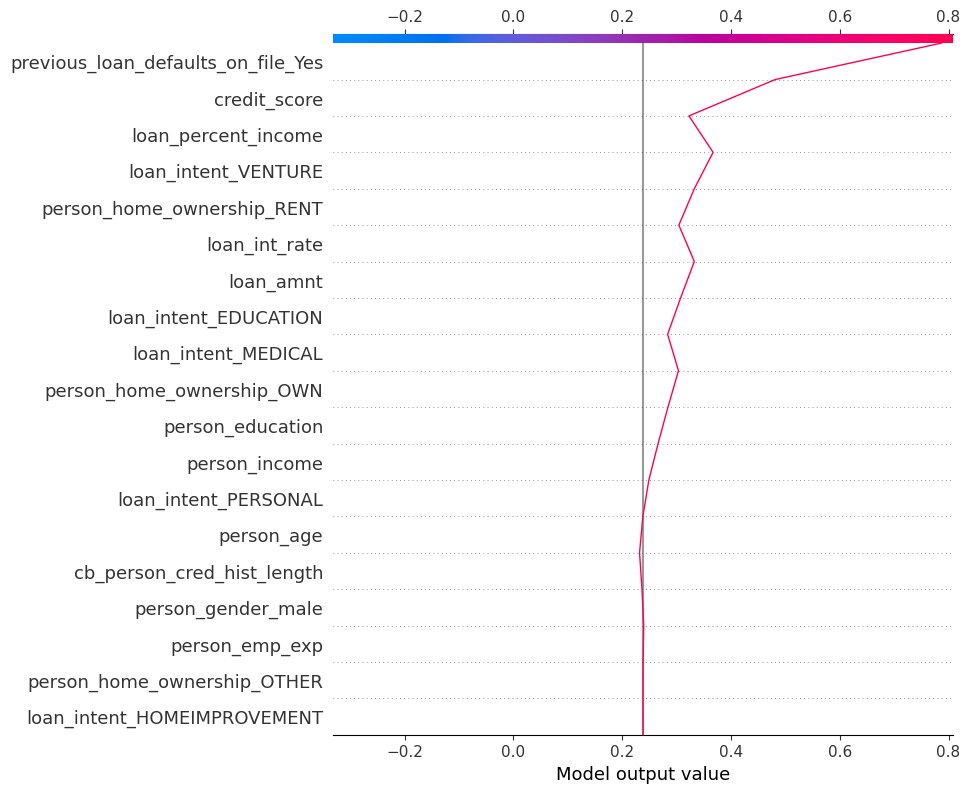

In [105]:
# decision plot

shap.plots.decision(shap_values = row_shap_values.values,base_value=explainer.expected_value[0],feature_names=preprocessor.get_feature_names_out())